In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import torch
from torch.utils.data import TensorDataset, DataLoader,Dataset
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.optim import lr_scheduler
import time 
import tqdm
from PIL import Image
train_on_gpu = True
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

from collections import OrderedDict
import cv2

In [15]:
from pathlib import Path
PATH =Path('data\whale')

In [19]:
full_train_df = pd.read_csv(PATH/'train.csv')
full_train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


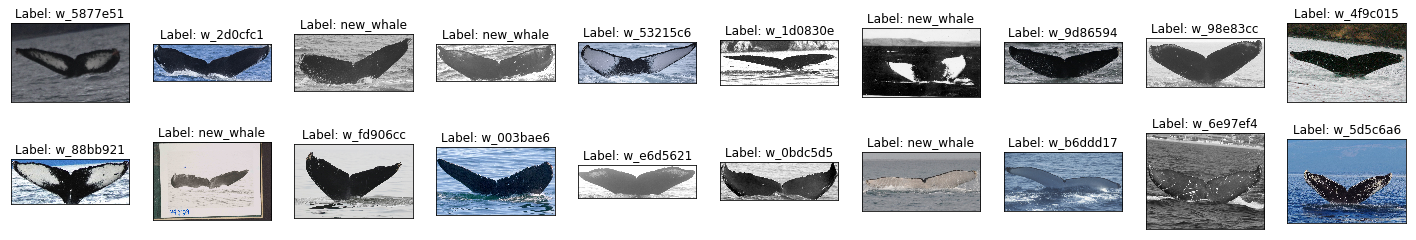

In [27]:
fig = plt.figure(figsize=(25, 4))
train_imgs = os.listdir(PATH/'train')
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    im = Image.open(os.path.join(PATH/'train/' , img))
    plt.imshow(im)
    lab = full_train_df.loc[full_train_df.Image == img, 'Id'].values[0]
    ax.set_title(f'Label: {lab}')

In [28]:
full_train_df.Id.value_counts().sort_values(ascending=False).head()

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
Name: Id, dtype: int64

In [30]:
import copy
new_whale_df = full_train_df.query("Id == 'new_whale'")
train_df = full_train_df.query("Id != 'new_whale'")
print(new_whale_df.shape)
print(train_df.shape)

(9664, 2)
(15697, 2)


In [35]:
import shutil

In [40]:
for image_name in train_df.Image.values:
    src_path = os.path.join(PATH/'train',image_name)
    dist_path = os.path.join(PATH/'target/train',image_name)
    shutil.copyfile(src_path, dist_path)

train_df.Id.value_counts()[train_df.Id.value_counts==0].shape[0]

In [41]:
for i in range(1,4):
    print(f'There are {train_df.Id.value_counts()[train_df.Id.value_counts==i].shape[0]} classes with {i} samples in train data.')

IndexError: tuple index out of range